In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../MachineLearning/datasets/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


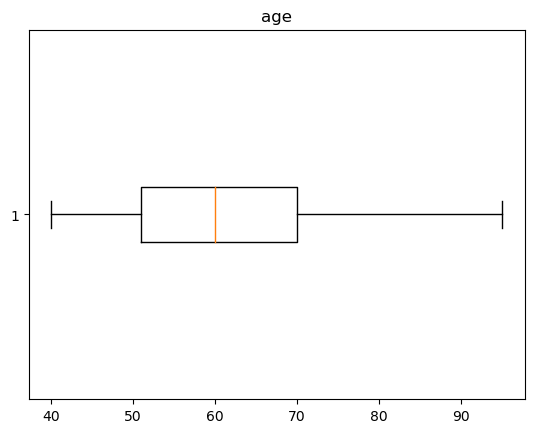

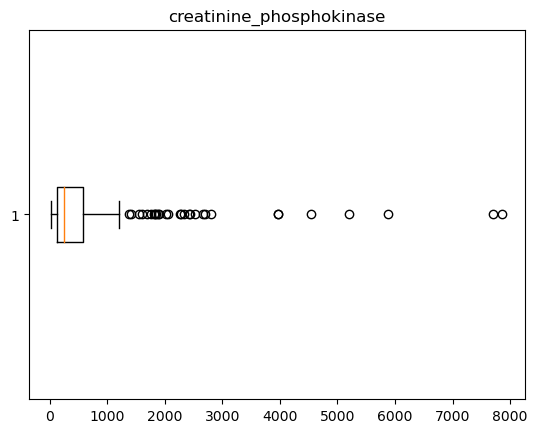

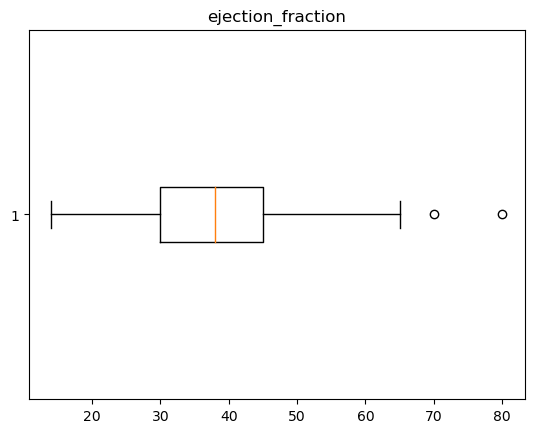

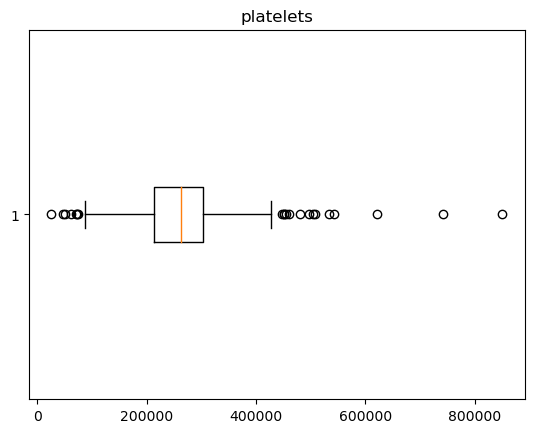

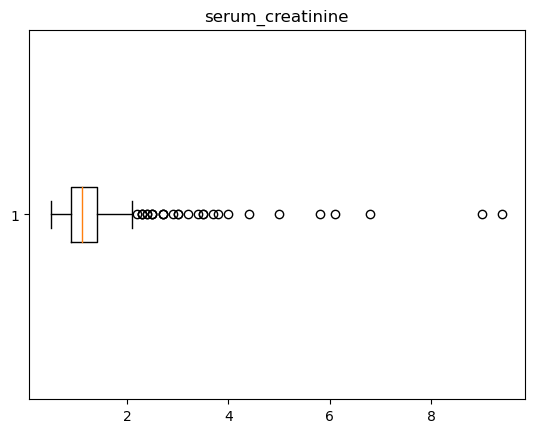

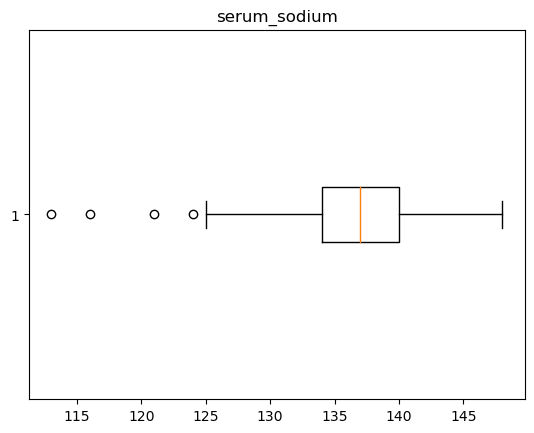

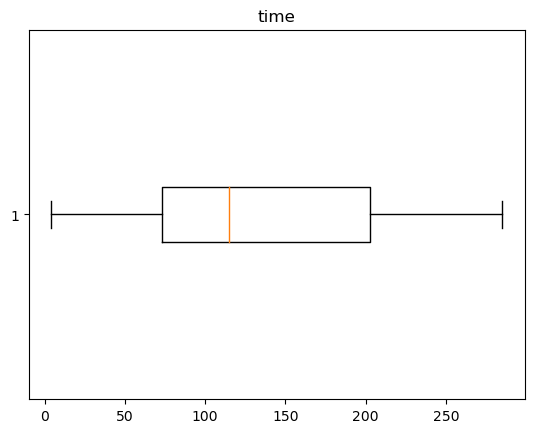

In [7]:
numerical=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for col in df[numerical]:
    plt.boxplot(df[col],vert=False)
    plt.title(col)
    plt.show()

In [8]:
def remove_outlier(df):
    for col in df.columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        upper_bound=q3+1.5*iqr
        lower_bound=q1-1.5*iqr
        df=df[(df[col]>lower_bound)&(df[col]<upper_bound)]
    return df
df=remove_outlier(df)

In [9]:
df.reset_index()

,index,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
1,2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
2,3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
3,5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
4,6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
219,292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
220,293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
221,294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


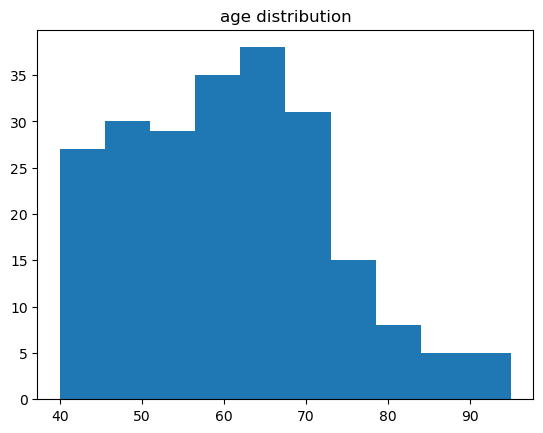

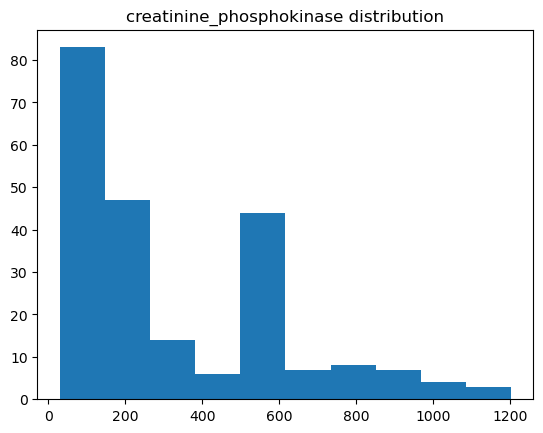

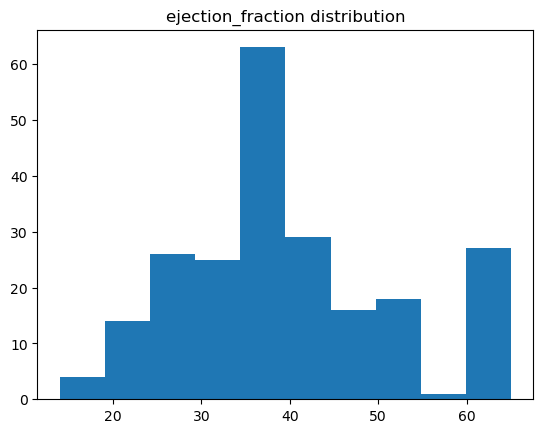

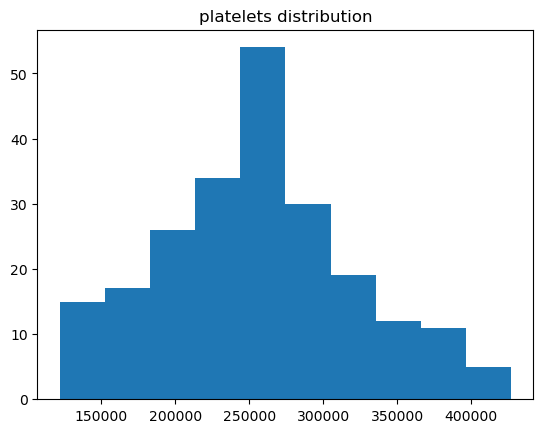

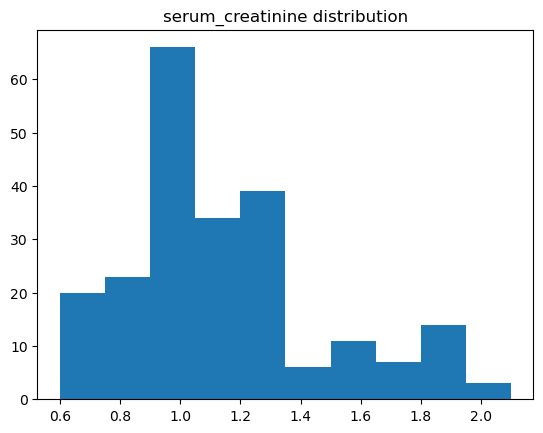

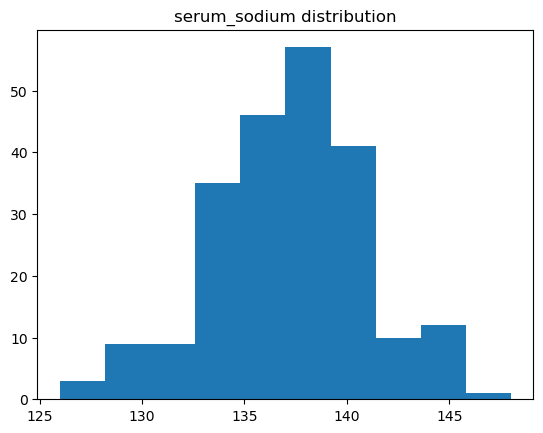

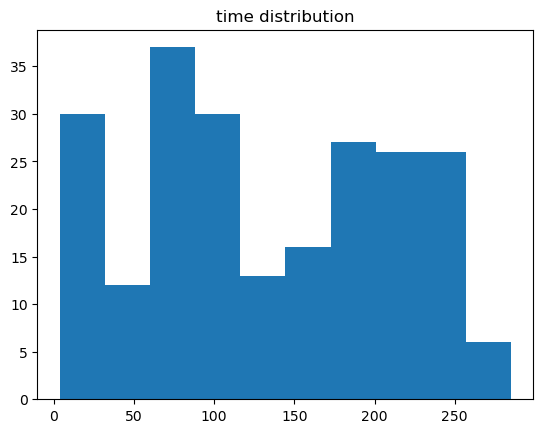

In [10]:
for i in numerical:
    plt.hist(df[i])
    plt.title(i + ' distribution')
    plt.show()

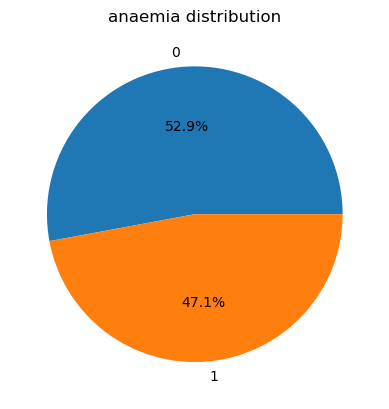

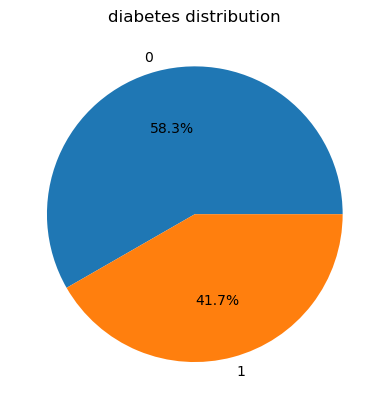

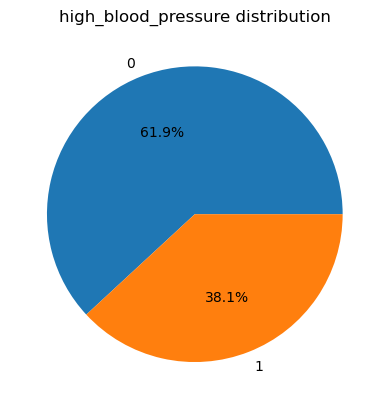

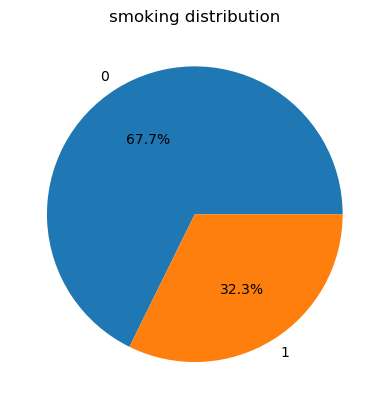

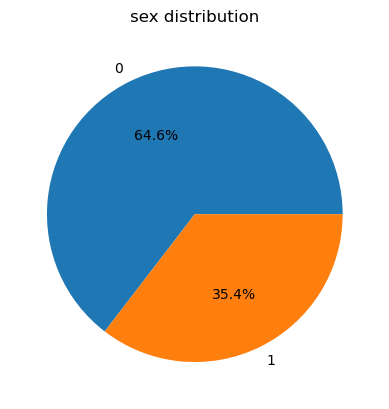

In [11]:
categorical_features= ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex']
 
for i in categorical_features:
    plt.pie(df[i].value_counts(),autopct='%1.1f%%',labels=[0,1])
    plt.title(i+' distribution')
    plt.show()

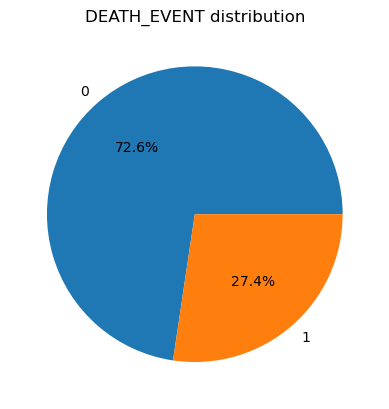

In [12]:
plt.pie(df['DEATH_EVENT'].value_counts(),autopct='%1.1f%%',labels=[0,1])
plt.title( 'DEATH_EVENT distribution')
plt.show()

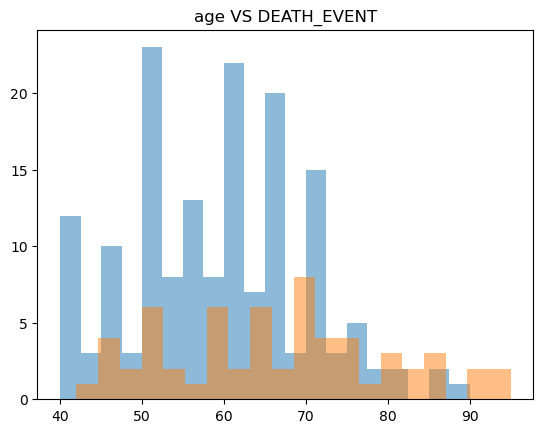

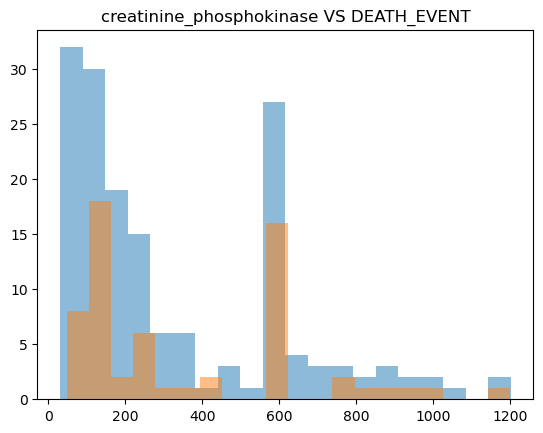

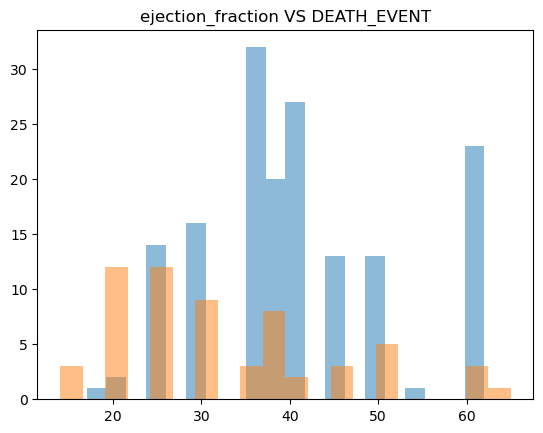

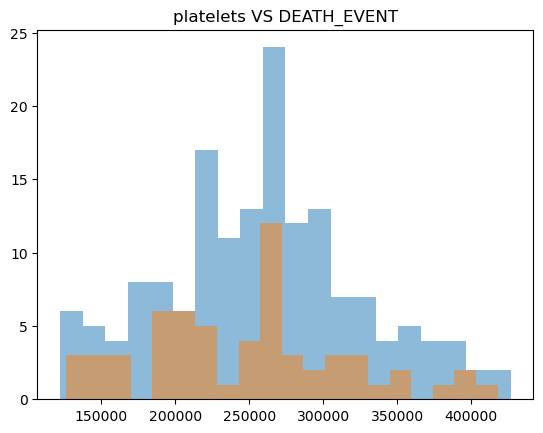

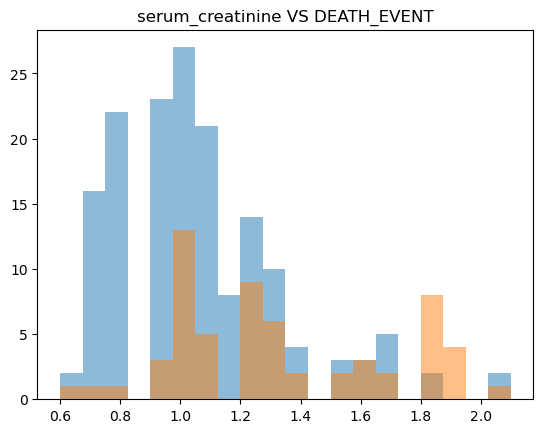

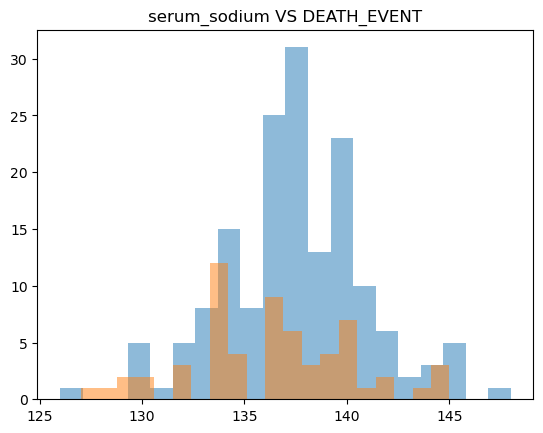

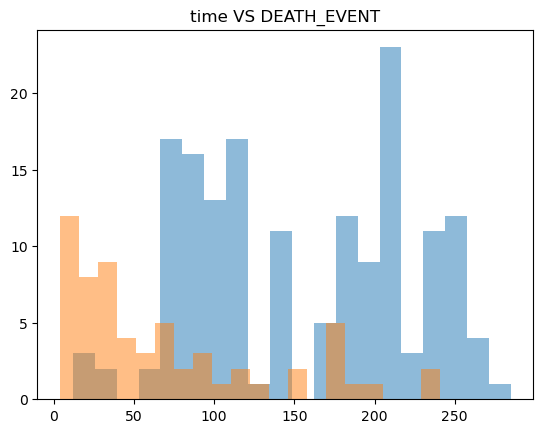

In [13]:
for i in numerical:
    plt.hist(df[df['DEATH_EVENT']==0][i],bins=20,alpha=0.5)
    plt.hist(df[df['DEATH_EVENT']==1][i],bins=20,alpha=0.5)
    plt.title(f'{i} VS DEATH_EVENT')
    plt.show()

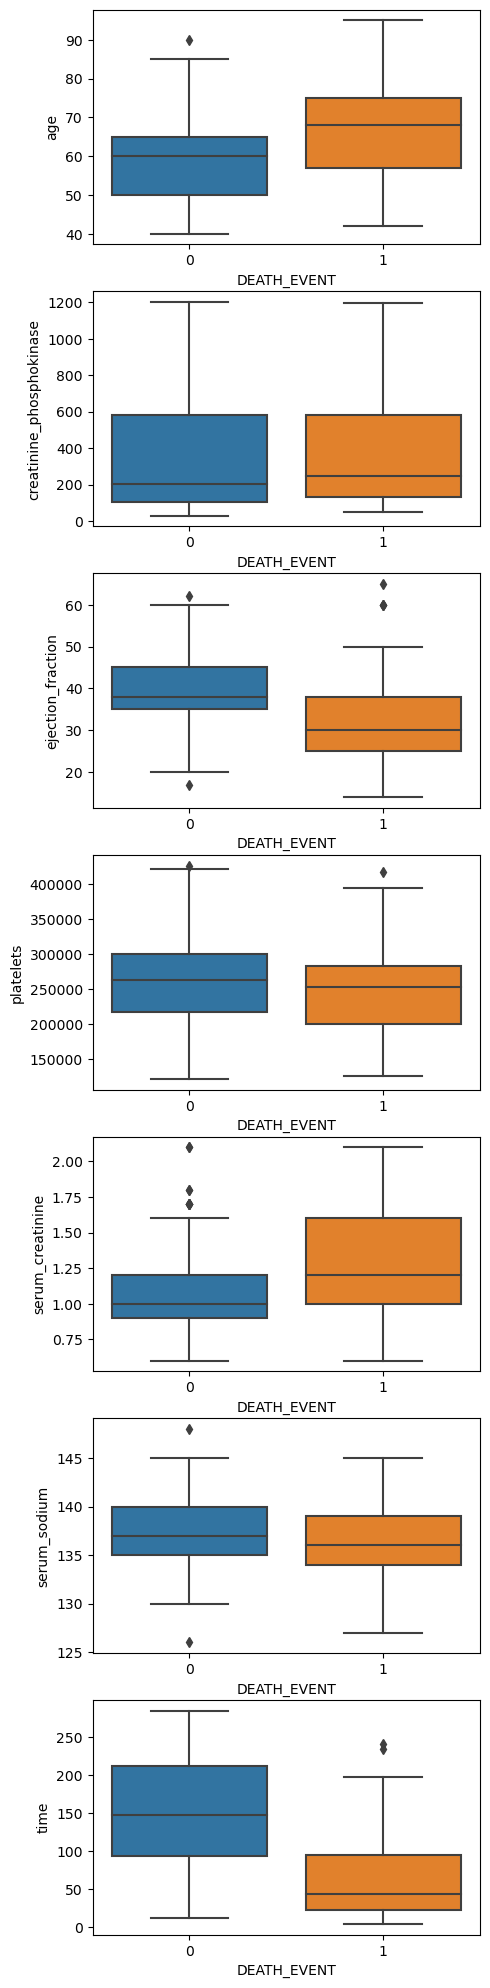

In [14]:
index=0
plt.figure(figsize=(5,25))
for feature in numerical:
    index+=1
    plt.subplot(7,1,index)
    sns.boxplot(x='DEATH_EVENT',y=feature,data=df)

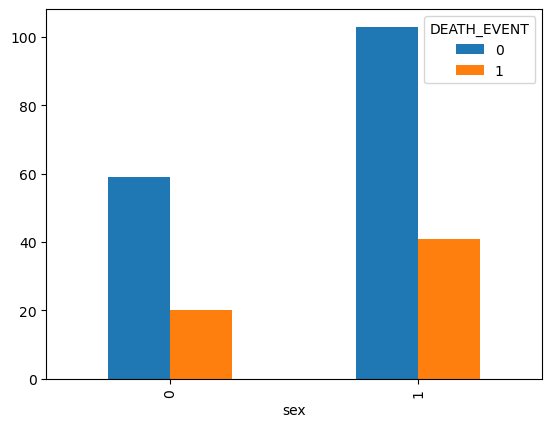

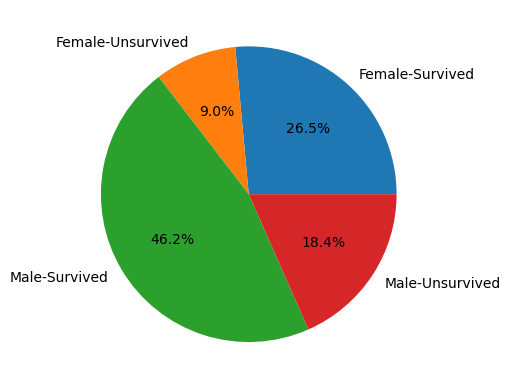

In [15]:
grouped_sex=df.groupby(['sex','DEATH_EVENT']).size()
grouped_sex.unstack().plot(kind='bar')
plt.show()

plt.pie(grouped_sex,labels=['Female-Survived','Female-Unsurvived','Male-Survived','Male-Unsurvived'],autopct='%1.1f%%')
plt.show()

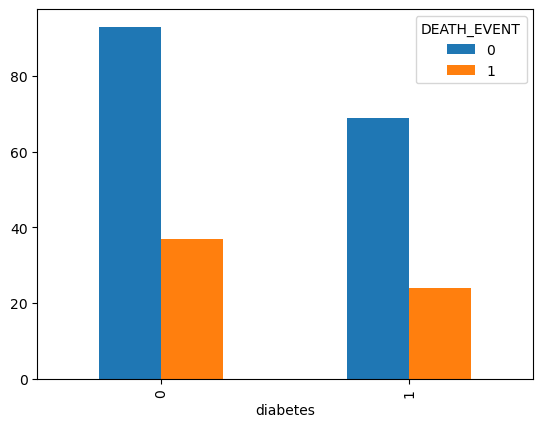

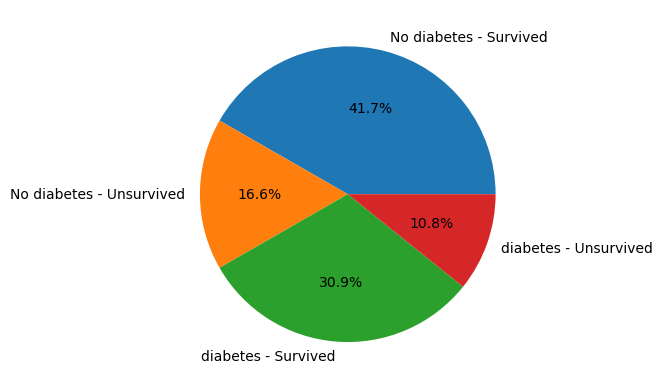

In [16]:
grouped_diabeties=df.groupby(['diabetes','DEATH_EVENT']).size()
grouped_diabeties.unstack().plot(kind='bar')
plt.show()

plt.pie(grouped_diabeties,labels=['No diabetes - Survived', 'No diabetes - Unsurvived', 'diabetes - Survived', 'diabetes - Unsurvived'],autopct='%1.1f%%')
plt.show()


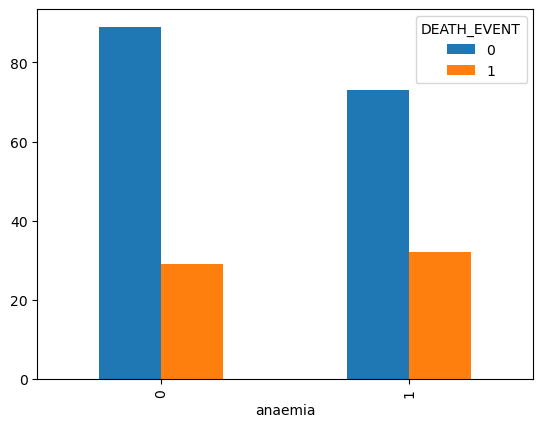

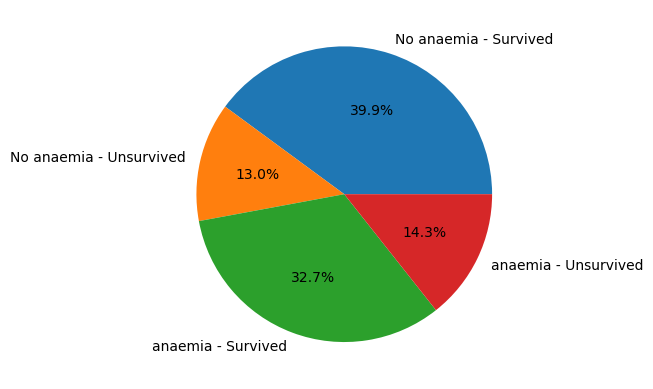

In [17]:
grouped_anaemia= df.groupby(['anaemia', 'DEATH_EVENT']).size()
grouped_anaemia.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_anaemia, labels=['No anaemia - Survived', 'No anaemia - Unsurvived', 'anaemia - Survived', 'anaemia - Unsurvived'], autopct='%1.1f%%')
plt.show()

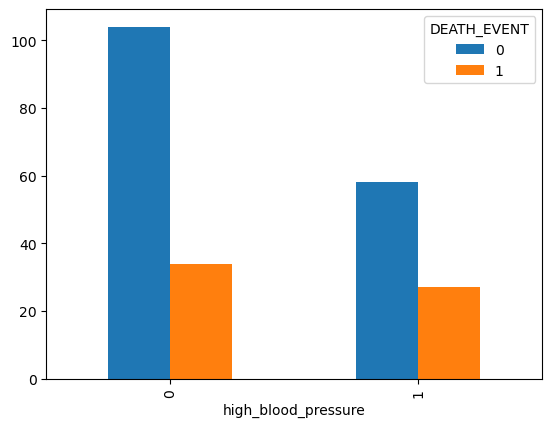

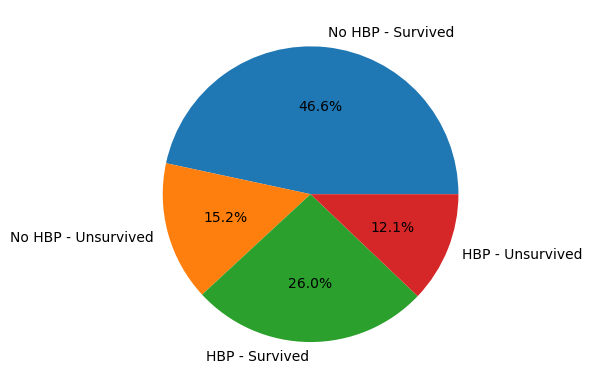

In [18]:
grouped_high_blood_pressure= df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size()
grouped_high_blood_pressure.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_high_blood_pressure, labels=['No HBP - Survived', 'No HBP - Unsurvived', 'HBP - Survived', 'HBP - Unsurvived'], autopct='%1.1f%%')
plt.show()

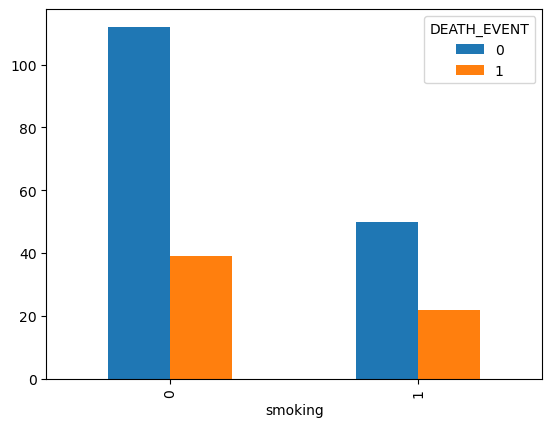

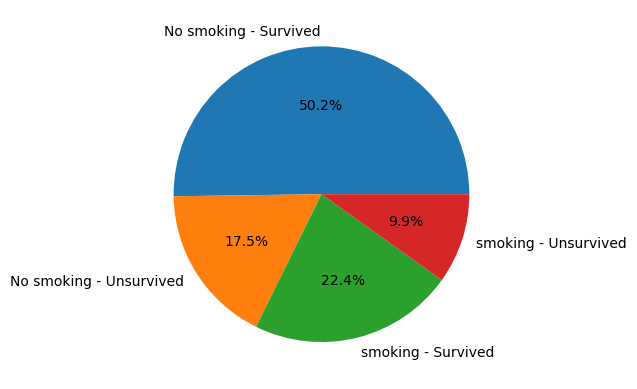

In [19]:
grouped_smoking= df.groupby(['smoking', 'DEATH_EVENT']).size()
grouped_smoking.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_smoking, labels=['No smoking - Survived', 'No smoking - Unsurvived', 'smoking - Survived', 'smoking - Unsurvived'], autopct='%1.1f%%')
plt.show()

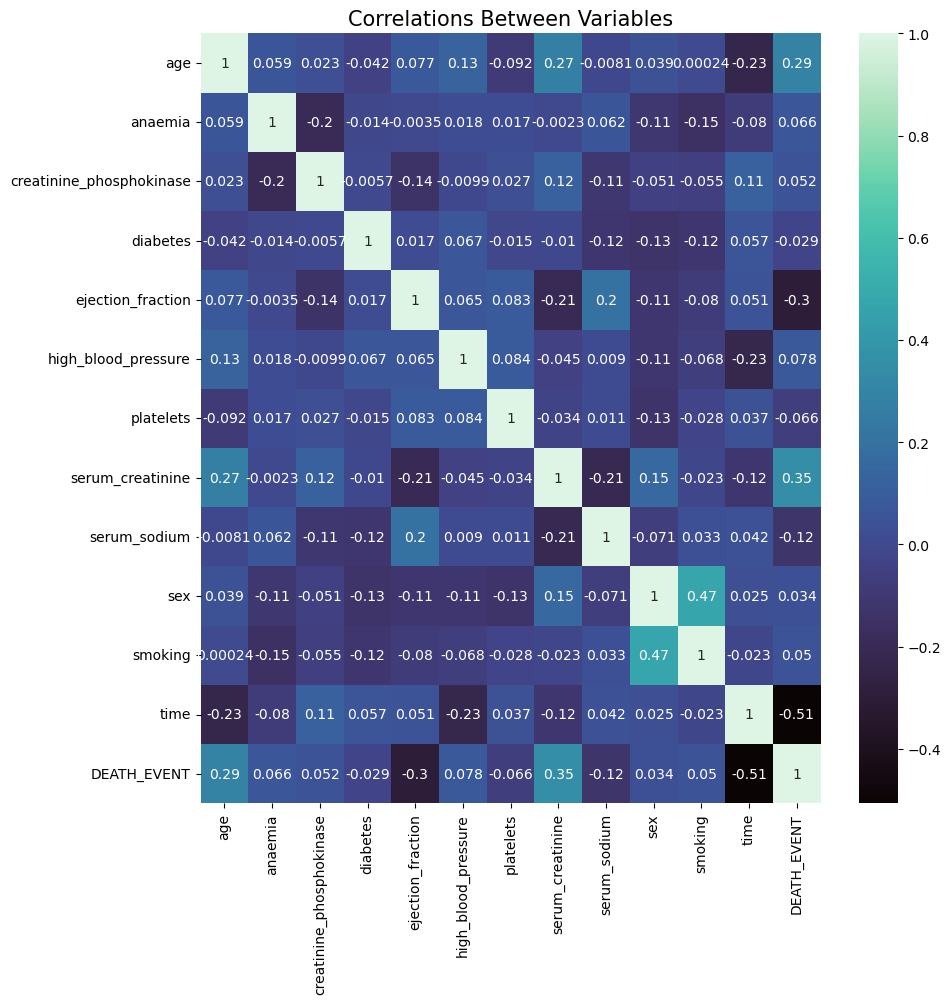

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='mako')
plt.title("Correlations Between Variables",size=15)
plt.show()

In [21]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [22]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10


In [23]:
Y.head()

0    1
2    1
3    1
5    1
6    1
Name: DEATH_EVENT, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [25]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X=sc.fit_transform(X)

In [26]:
accuarcy_list=[]

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        37
           1       0.87      0.68      0.76        19

    accuracy                           0.86        56
   macro avg       0.86      0.82      0.83        56
weighted avg       0.86      0.86      0.85        56



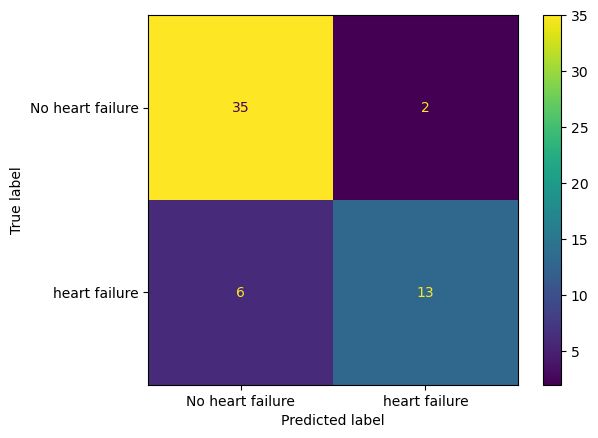

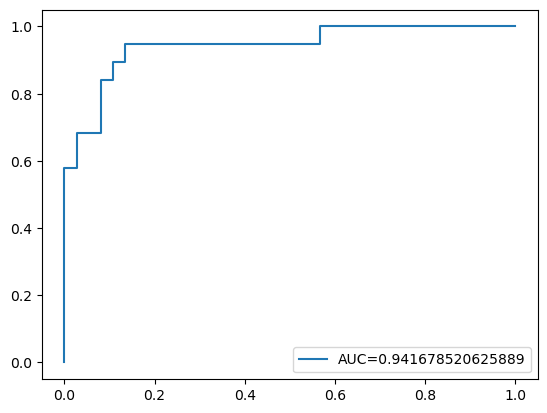

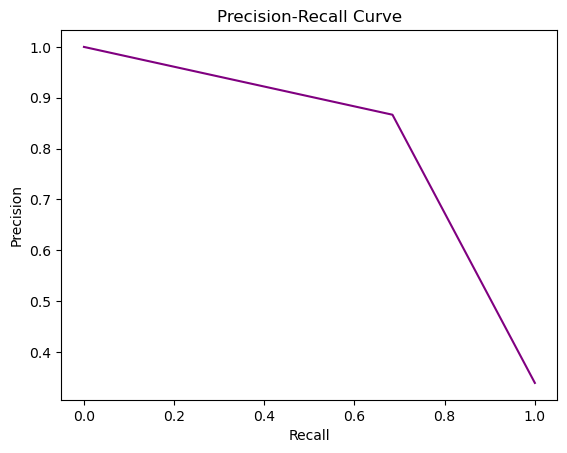

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve


log_reg=LogisticRegression(random_state=1)
log_reg.fit(X_train,Y_train)
log_reg_pred=log_reg.predict(X_test)



log_red_acc=accuracy_score(Y_test,log_reg_pred)
accuarcy_list.append(100*log_red_acc)
print(classification_report(Y_test,log_reg_pred))


cm=confusion_matrix(Y_test,log_reg_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

y_pred_proba=log_reg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,y_pred_proba)
auc=metrics.roc_auc_score(Y_test,y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

precision, recall, thresholds = precision_recall_curve(Y_test, log_reg_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve

sv_clf=SVC(C=1.0,kernel='linear',random_state=1,probability=True)
sv_clf.fit(X_train,Y_train)
sv_clf_pred=sv_clf.predict(X_test)

sv_clf_acc=accuracy_score(Y_test,sv_clf_pred)
accuarcy_list.append(100*sv_clf_acc)
print(classification_report(Y_test,sv_clf_pred))

cm=confusion_matrix(Y_test,sv_clf_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

sv_clf_pred_proba=sv_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  sv_clf_pred_proba)
auc = metrics.roc_auc_score(Y_test, sv_clf_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

precision, recall, thresholds = precision_recall_curve(Y_test, sv_clf_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kn_clf = KNeighborsClassifier(n_neighbors=5)
kn_clf.fit(X_train, Y_train)
kn_pred = kn_clf.predict(X_test)

# evaluation

kn_acc = accuracy_score(Y_test, kn_pred)
accuarcy_list.append(100*kn_acc)
print(classification_report(Y_test, kn_pred))

# confusion matrix

cm = confusion_matrix(Y_test, kn_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = kn_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(Y_test, kn_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# implementation

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1, criterion='entropy')
dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)

# evaluation

dt_acc = accuracy_score(Y_test, dt_pred)
accuarcy_list.append(100*dt_acc)
print(classification_report(Y_test, dt_pred))

# confusion matrix

cm = confusion_matrix(Y_test, dt_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = dt_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(Y_test, dt_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X_train, Y_train)
r_pred = r_clf.predict(X_test)

# evaluation

r_clf_acc = accuracy_score(Y_test, r_pred)
accuarcy_list.append(100*r_clf_acc)
print(classification_report(Y_test, r_pred))

# confusion matrix

cm = confusion_matrix(Y_test, r_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = r_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(Y_test, r_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(X_train,Y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)

# evaluation

gradientboost_clf_acc = accuracy_score(Y_test, gradientboost_pred)
accuarcy_list.append(100*gradientboost_clf_acc)
print(classification_report(Y_test, gradientboost_pred))

# confusion matrix

cm = confusion_matrix(Y_test, gradientboost_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = gradientboost_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(Y_test, gradientboost_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


In [ ]:
import xgboost

xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(X_train,Y_train)
xgb_pred = xgb_clf.predict(X_test)

# evaluation

xgb_clf_acc = accuracy_score(Y_test, xgb_pred)
accuarcy_list.append(100*xgb_clf_acc)
print(classification_report(Y_test, xgb_pred))

# confusion matrix

cm = confusion_matrix(Y_test, xgb_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = xgb_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(Y_test, xgb_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
model_list = ['LogisticRegression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBoosting','XGB']

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuarcy_list, palette = "tab10", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()